In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import DCCSMLM

In [2]:
# Load reference proteins from file
reference = DCCSMLM.DCCReferenceProteins("ExampleData/CalibrationValues.csv", "rate_mVenus", "stoichiometry")


n_bootstrap = 10000 # Number of bootstrap resamples
n_max = 4 # Maximum oligomeric state to consider
only_consider_p = False # Set this to True if you only want to

In [3]:
vglut1 = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_vGlut1.csv", "rate_mVenus")
vglut2 = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_vGlut2.csv", "rate_mVenus")
vglut3 = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_vGlut3.csv", "rate_mVenus")
sialin = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_sialin.csv", "rate_mVenus")

vglut = {"vGlut1": vglut1, "vGlut2": vglut2, "vGlut3": vglut3, "Sialin": sialin}



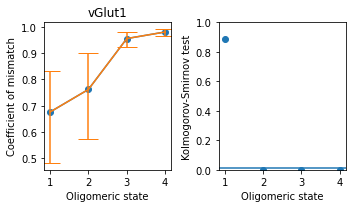

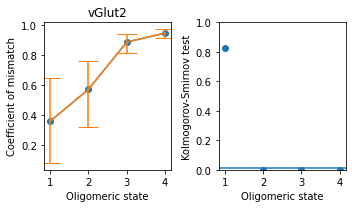

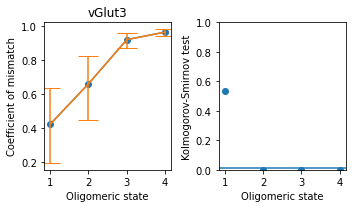

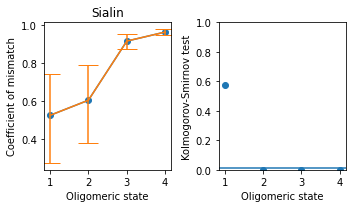

In [4]:
for isoform in vglut:
    vglut[isoform].com_bootstrap(n_bootstrap, reference, reference_bootstrap=True, max_n=n_max, only_p=only_consider_p)
    vglut[isoform].KS(reference, save_results=True)


    plt.figure(figsize=(5,3))
    
    plt.subplot(121)
    plt.plot(range(1,n_max+1), vglut[isoform].bs_mean, marker="o")
    plt.errorbar(range(1,n_max+1), vglut[isoform].bs_mean, yerr=
                 [(vglut[isoform].bs_mean-vglut[isoform].bs_lower_ci),
                 (vglut[isoform].bs_upper_ci-vglut[isoform].bs_mean)],
                capsize=10)
    plt.ylabel("Coefficient of mismatch")
    plt.xlabel("Oligomeric state")
    
    plt.title(isoform)
    
    plt.subplot(122)
    plt.plot(range(1, n_max+1), vglut[isoform].ks, lw=0, marker="o")
    plt.ylim(0,1)
    plt.ylabel("Kolmogorov-Smirnov test")
    plt.xlabel("Oligomeric state")
    plt.axhline(0.05/n_max)
    
    plt.tight_layout()
    plt.show()

In [5]:
slc26a3 = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_SLC26A3.csv", "rate_mVenus")
prestin = DCCSMLM.DCCProteinOfInterest("ExampleData/coloc_prestin.csv", "rate_mVenus")

slc26 = {"SLC26A3": slc26a3, "SLC26A5": prestin}



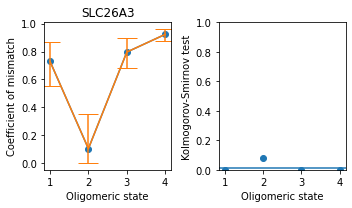

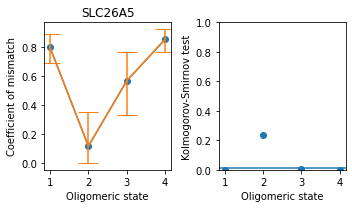

In [6]:
for isoform in slc26:
    slc26[isoform].com_bootstrap(n_bootstrap, reference, reference_bootstrap=True, max_n=n_max, only_p=only_consider_p)
    slc26[isoform].KS(reference, save_results=True)
    
    plt.figure(figsize=(5,3))
    
    plt.subplot(121)
    plt.plot(range(1,n_max+1), slc26[isoform].bs_mean, marker="o")
    plt.errorbar(range(1,n_max+1), slc26[isoform].bs_mean, yerr=
                 [(slc26[isoform].bs_mean-slc26[isoform].bs_lower_ci),
                 (slc26[isoform].bs_upper_ci-slc26[isoform].bs_mean)],
                capsize=10)
    plt.ylabel("Coefficient of mismatch")
    plt.xlabel("Oligomeric state")
    
    plt.title(isoform)
    
    plt.subplot(122)
    plt.plot(range(1, n_max+1), slc26[isoform].ks, lw=0, marker="o")
    plt.ylim(0,1)
    plt.ylabel("Kolmogorov-Smirnov test")
    plt.xlabel("Oligomeric state")
    plt.axhline(0.05/n_max)
    
    plt.tight_layout()
    plt.show()